In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
x1=[1,3,4,2,0,5]; 
x1 = x1 + [-e for e in x1]

y1=[3,2,5,3,2,5]; 
y1 = y1 + [-e for e in y1]

x2=[6,8,9,7,5,4]; 
x2 = x2 + [-e for e in x2]

y2=[9,7,11,9,7,8]; 
y2 = y2 + [-e for e in y2]

In [3]:
d = {'x': x1+x2, 'y': y1+y2, 'c':[0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1]}
df = pd.DataFrame(d)
df

,x,y,c
0,1,3,0
1,3,2,0
2,4,5,0
3,2,3,0
4,0,2,0
5,5,5,0
6,-1,-3,0
7,-3,-2,0
8,-4,-5,0
9,-2,-3,0


In [45]:
df.shape

(24, 3)

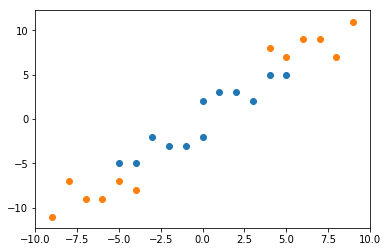

In [43]:
plt.scatter(df.x[df.c==0],df.y[df.c==0])
plt.scatter(df.x[df.c==1],df.y[df.c==1])
plt.show()

In [4]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b


In [5]:
#kernal trick
x1_sq = [e**2 for e in df.x[df.c==0]]
y1_sq = [e**2 for e in df.y[df.c==0]]

x2_sq = [e**2 for e in df.x[df.c==1]]
y2_sq = [e**2 for e in df.y[df.c==1]]

best fit line:
y = 4.76 + 0.86x
best fit line:
y = 44.43 + 0.66x


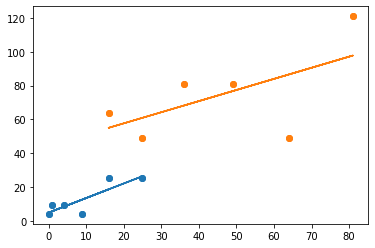

In [6]:
plt.scatter(x1_sq,y1_sq)
a, b = best_fit(x1_sq, y1_sq)
yfit1 = [a + b * xi for xi in x1_sq]
plt.plot(x1_sq, yfit1)

plt.scatter(x2_sq,y2_sq)
a, b = best_fit(x2_sq, y2_sq)
yfit2 = [a + b * xi for xi in x2_sq]
plt.plot(x2_sq, yfit2)

plt.show()

In [7]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
svm = LinearSVC()
lrc = LogisticRegression()

In [8]:
x = df.drop(['c'],axis=1)
y = df.c
x.shape

(24, 2)

In [10]:
svm.fit(x,y)

C:\Users\Dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [11]:
lrc.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
pred_svm = svm.predict(x)
pred_lrc = lrc.predict(x)

In [13]:
from sklearn.metrics import classification_report
print("svm:")
print(classification_report(pred_svm, y))
print("")
print("lrc:")
print(classification_report(pred_lrc, y))

svm:
              precision    recall  f1-score   support

           0       1.00      0.52      0.69        23
           1       0.08      1.00      0.15         1

    accuracy                           0.54        24
   macro avg       0.54      0.76      0.42        24
weighted avg       0.96      0.54      0.66        24


lrc:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        24
           1       0.00      0.00      0.00         0

    accuracy                           0.50        24
   macro avg       0.50      0.25      0.33        24
weighted avg       1.00      0.50      0.67        24



C:\Users\Dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
